In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv(r"C:\Users\shara\Downloads\Heart_Disease\Heart_Disease_data.csv")

In [4]:
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1025 non-null   int64  
 1   Sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


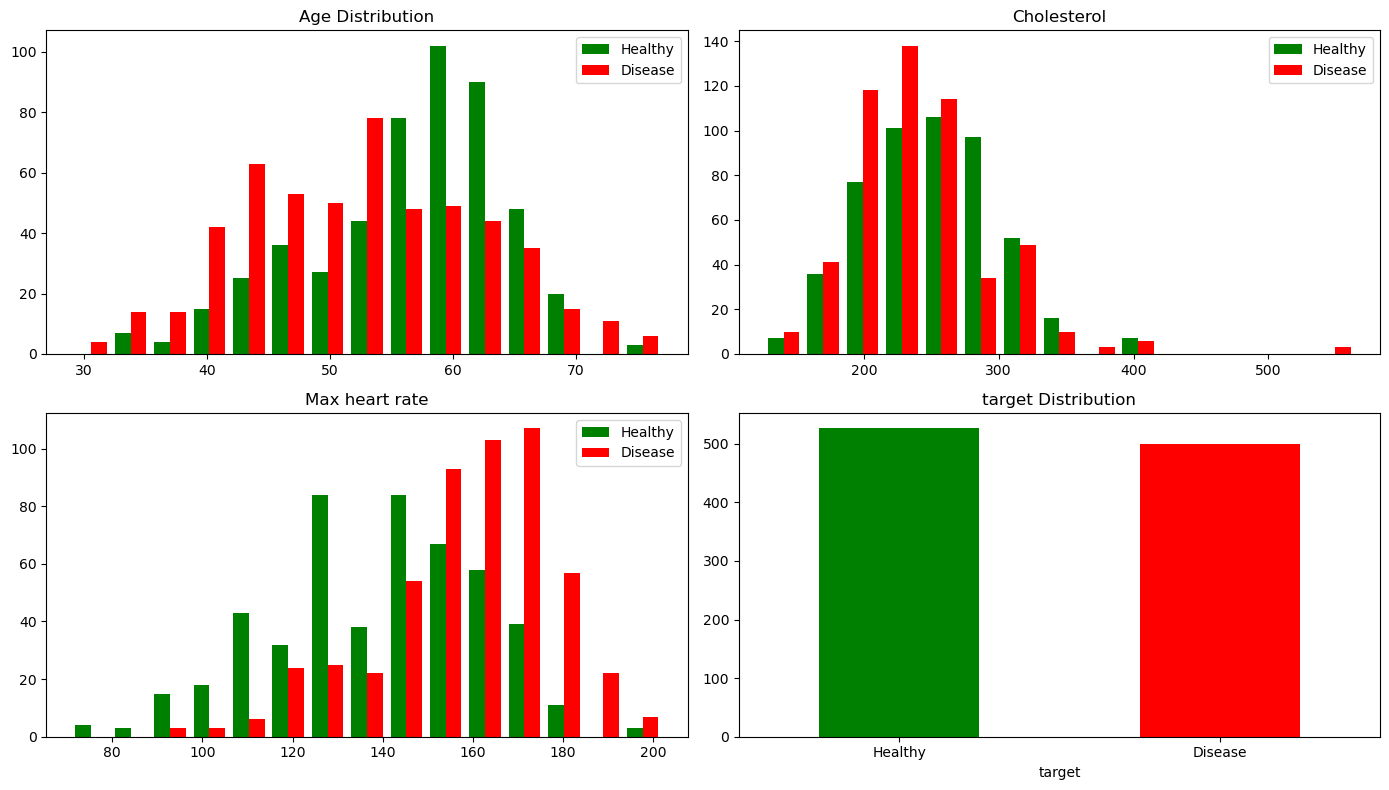

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

axes[0,0].hist([df[df['target']==0]['Age'], df[df['target']==1]['Age']],
                label=['Healthy','Disease'], bins=15, color=['green','red'])
axes[0, 0].set_title('Age Distribution')
axes[0,0].legend()

axes[0,1].hist([df[df['target']==0]['chol'], df[df['target']==1]['chol']],
                label=['Healthy','Disease'], bins=15, color=['green','red'])
axes[0,1].set_title('Cholesterol')
axes[0,1].legend()

axes[1,0].hist([df[df['target']==0]['thalach'], df[df['target']==1]['thalach']],
                label=['Healthy','Disease'], bins=15, color=['green','red'])
axes[1,0].set_title('Max heart rate')
axes[1,0].legend()

df['target'].value_counts().plot(kind='bar', ax=axes[1,1], color=['green','red'])
axes[1,1].set_title('target Distribution')
axes[1,1].set_xticklabels(['Healthy','Disease'], rotation=0)

plt.tight_layout()
plt.show()

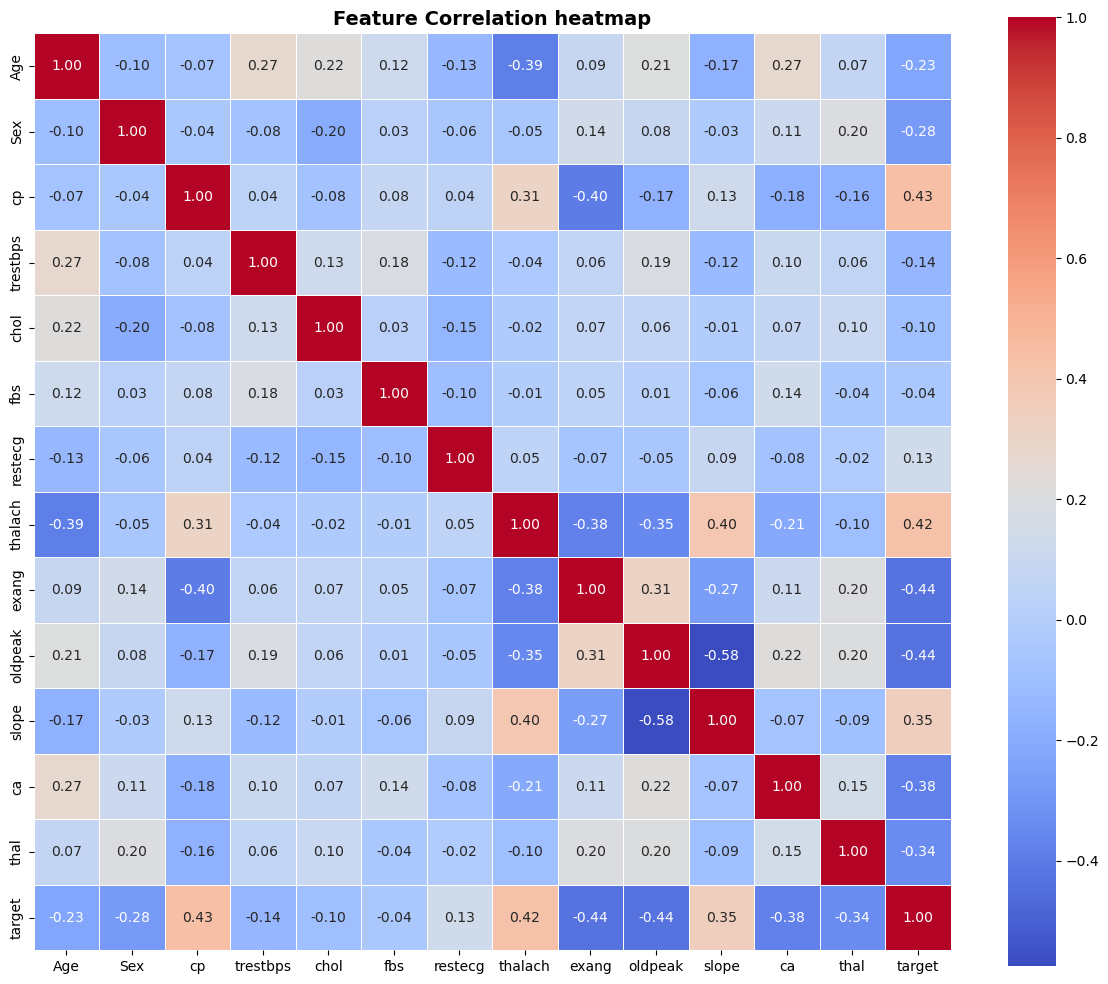

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Feature Correlation heatmap',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[ : , -1].values

In [10]:
x.shape

(1025, 13)

In [11]:
y.shape

(1025,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(820, 13)

In [14]:
X_test.shape

(205, 13)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.81162633, -1.50996689, -0.90957214, ..., -0.59754229,
         2.20730061, -0.56245085],
       [ 0.15224695, -1.50996689, -0.90957214, ..., -2.1987994 ,
         1.22840039,  1.0906305 ],
       [ 0.26214351,  0.66226618,  1.04803719, ..., -0.59754229,
         0.24950018,  1.0906305 ],
       ...,
       [ 0.81162633, -1.50996689, -0.90957214, ..., -2.1987994 ,
         2.20730061,  1.0906305 ],
       [-0.17744274,  0.66226618, -0.90957214, ..., -0.59754229,
         1.22840039,  1.0906305 ],
       [ 0.70172977,  0.66226618,  1.04803719, ..., -0.59754229,
        -0.72940004, -0.56245085]])

In [17]:
# baseline model

lg = LogisticRegression(max_iter=1000)
lg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = lg.predict(X_test_scaled)
y_prob = lg.predict_proba(X_test_scaled)[:, 1]

In [19]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"\nClassification Report: \n {classification_report(y_test, y_pred)}")

Confusion Matrix: 
 [[70 30]
 [ 9 96]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [20]:
param_grid = {
    "C": [0.01, 0.1, 1, 5, 10, 50],
    "penalty": ["l1", "l2"]
}

grid = GridSearchCV(
    LogisticRegression(
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced"
    ),
    param_grid,
    scoring="recall",
    cv=5
)

grid.fit(X_train_scaled, y_train)

best_lr = grid.best_estimator_

print(best_lr)
print("Best Logistic Regression Params:", grid.best_params_)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l1'}


In [21]:
y_pred_lr = best_lr.predict(X_test_scaled)
y_prob_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic Regression (Fine-Tuned)")
print("--------------------------------")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_lr))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))



Logistic Regression (Fine-Tuned)
--------------------------------
Accuracy : 0.8195121951219512
Recall   : 0.9238095238095239
Precision: 0.7698412698412699
ROC-AUC  : 0.9287619047619048

Confusion Matrix:
 [[71 29]
 [ 8 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       100
           1       0.77      0.92      0.84       105

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [22]:
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
                       random_state=42)

In [23]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classifier")
print("------------------------")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier
------------------------
Accuracy : 0.9658536585365853
Recall   : 0.9714285714285714
Precision: 0.9622641509433962
ROC-AUC  : 0.9892380952380952

Confusion Matrix:
 [[ 96   4]
 [  3 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.96      0.97      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [24]:

# Train performance
train_pred = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Test performance
test_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.9890243902439024
Test Accuracy : 0.9658536585365853


In [25]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(
    rf, x, y,
    cv=5,
    scoring="roc_auc"
)

print("CV ROC-AUC:", cv_auc.mean())

CV ROC-AUC: 0.9897503879768031


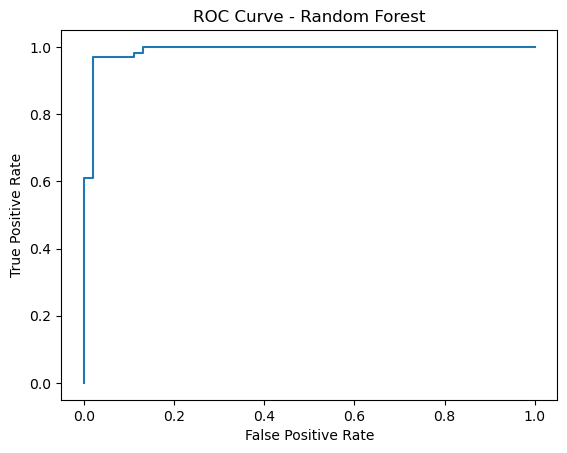

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()

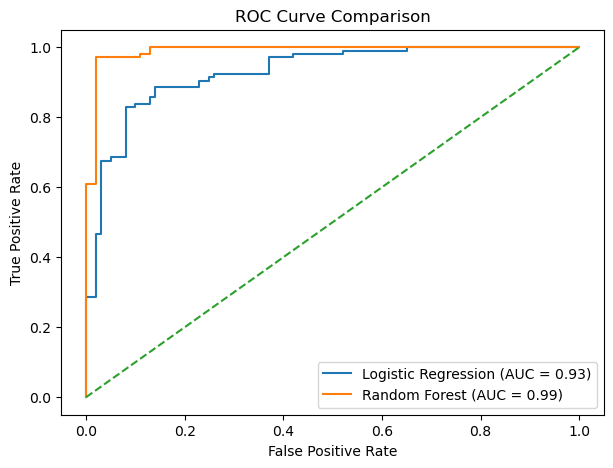

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [29]:
models = ['Logistic Regression', 'Random Forest']
recall_scores = [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)]  

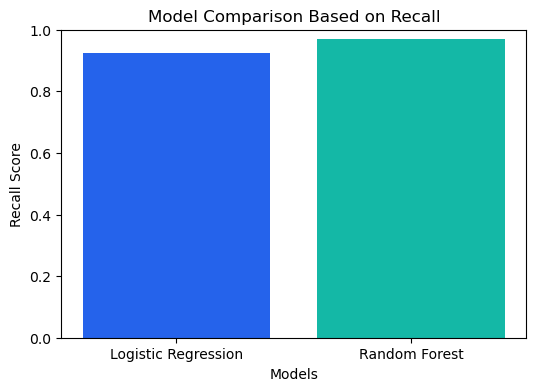

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
colors = ["#2563eb", "#14b8a6"]  # Blue, Teal
plt.bar(models, recall_scores, color = colors)

plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Model Comparison Based on Recall")

plt.ylim(0, 1) 

plt.show()

In [27]:
import joblib

joblib.dump(best_lr, "heart_logistic.pkl")
joblib.dump(rf, "heart_rf.pkl")
joblib.dump(scaler, "heart_scaler.pkl")

['heart_scaler.pkl']